In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot,iplot
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA

In [6]:
pd.set_option("display.max_columns",None)

In [7]:
data = pd.read_csv("1000_Companies.csv")

In [8]:
df = data.copy()

In [9]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
df[df.duplicated]

,R&D Spend,Administration,Marketing Spend,State,Profit
755,84533.0,122941.3141,231885.6935,California,121248.7116


In [37]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [13]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [15]:
df = df.replace(0,np.nan)

In [16]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,998.000000,1000.000000,997.000000,1000.000000
mean,81832.592385,122963.897612,226885.715566,119546.164656
std,46440.103030,12613.927535,90869.558039,42888.633848
min,542.050000,51283.140000,1903.930000,14681.400000
25%,43281.500000,116640.684850,151751.515600,85943.198543
50%,80140.000000,122421.612150,225043.676800,117641.466300
75%,124620.500000,129139.118000,309075.450300,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [17]:
df.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

# Data Preprocessing

In [22]:
df.drop(df[df.duplicated()].index[0],inplace=True)

In [26]:
df[df["R&D Spend"].isnull() | df["Marketing Spend"].isnull()]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,NaN,New York,122776.86
47,NaN,135426.92,NaN,California,42559.73
48,542.05,51743.15,NaN,New York,35673.41
49,NaN,116983.80,45173.06,California,14681.40


In [28]:
x = df[["R&D Spend","Marketing Spend"]].values
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
df[["R&D Spend","Marketing Spend"]] = imputer.fit_transform(x)

In [29]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [36]:
for c in df.columns:
    if c == "State":
        continue
    print(f"{c}:\n\tMin: {df[c].min()}  Max:{df[c].max()}")
    print("_"*50)

R&D Spend:
	Min: 542.05  Max:165349.2
__________________________________________________
Administration:
	Min: 51283.14  Max:321652.14
__________________________________________________
Marketing Spend:
	Min: 1903.93  Max:471784.1
__________________________________________________
Profit:
	Min: 14681.4  Max:476485.43
__________________________________________________


# Data Visualization

In [38]:
num = df.select_dtypes("number").columns.to_list()

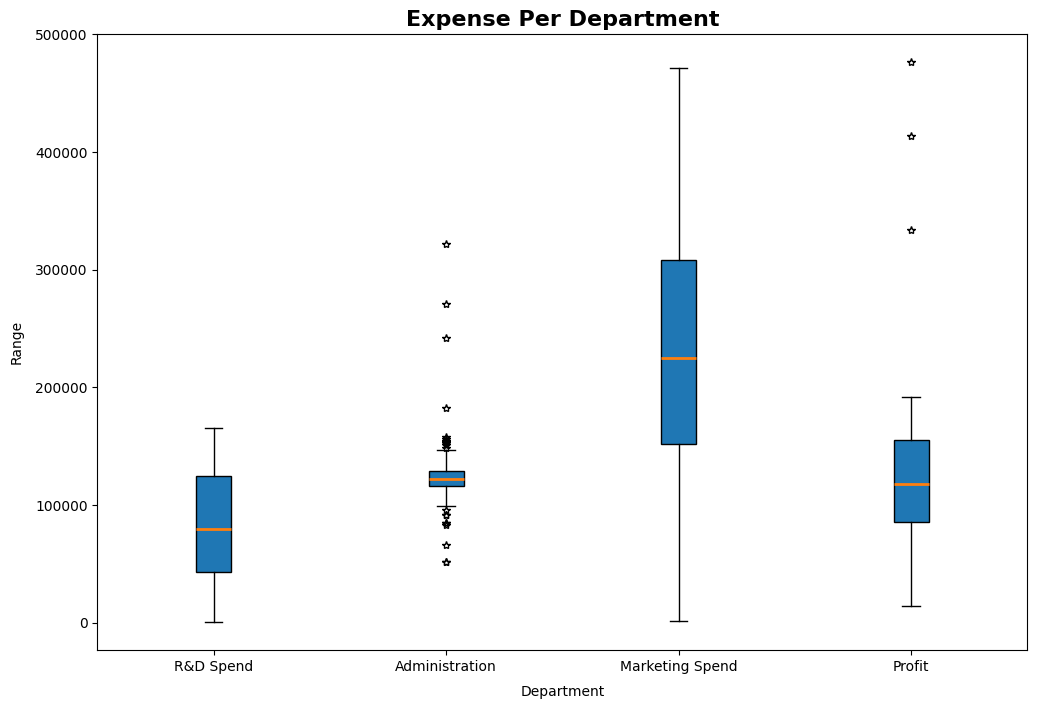

In [46]:
pos = np.arange(1,len(num)+1)
plt.figure(figsize=(12,8))
plt.title("Expense Per Department",fontsize=16,pad=6,weight='bold')
plt.xlabel("Department",labelpad=8)
plt.ylabel("Range",labelpad=8)
for i,f in enumerate(num):
    plt.boxplot(df[f],positions=[i],sym='*',patch_artist=True,medianprops={"linewidth":2})
plt.xticks(ticks=pos-1,labels=num)
plt.show()

In [56]:
g = df.groupby("State")["R&D Spend"].sum()
g

State
California    27872118.16
Florida       26944276.26
New York      26927947.78
Name: R&D Spend, dtype: float64

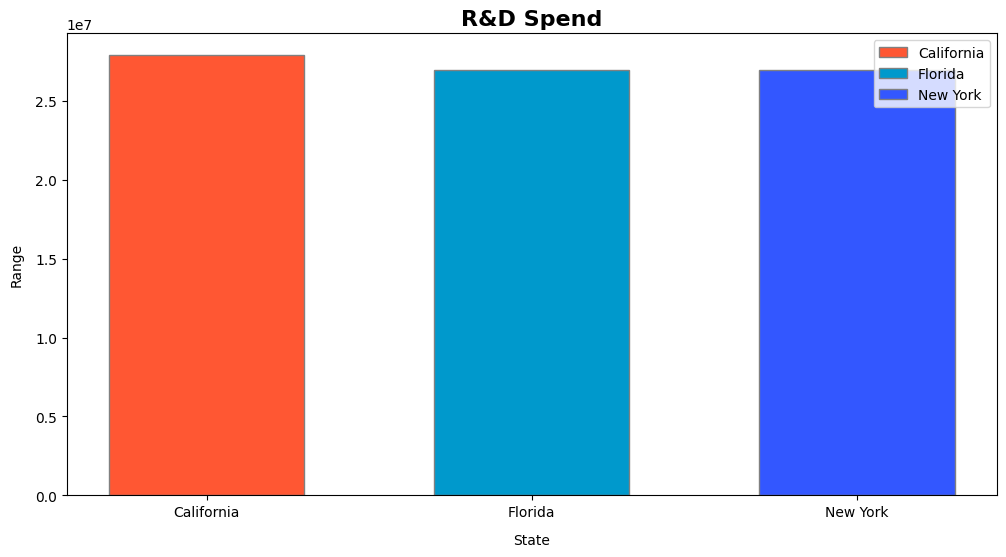

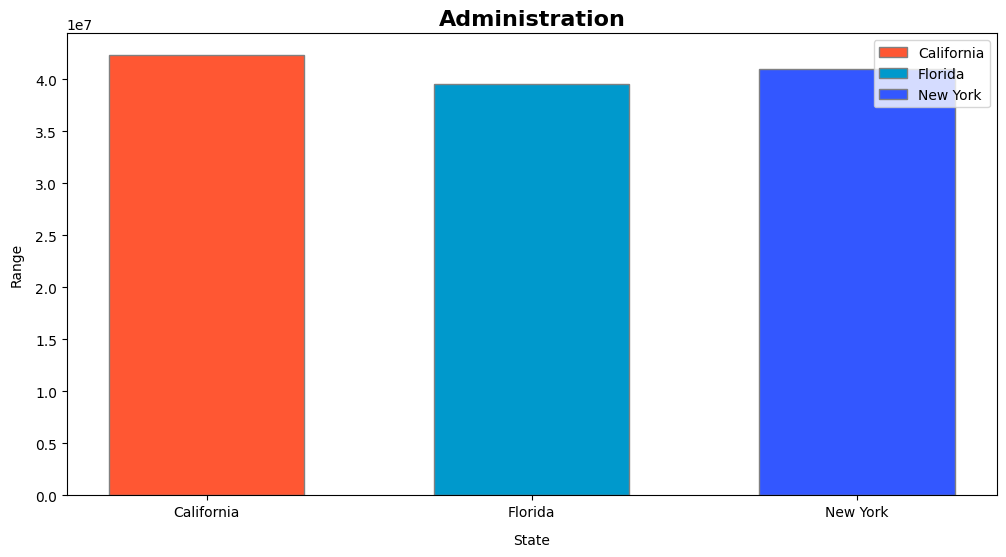

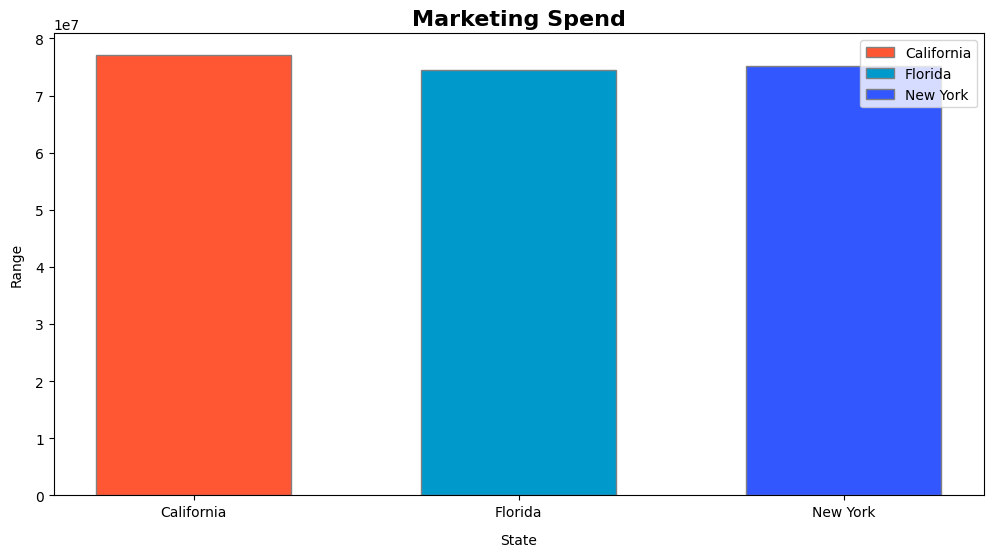

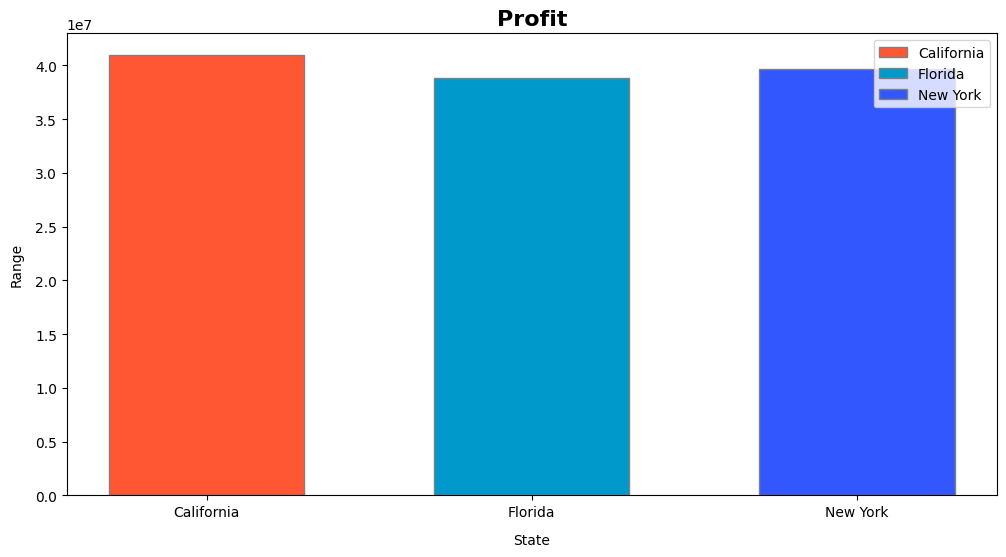

In [63]:
for f in num:
    g = df.groupby("State")[f].sum()
    plt.figure(figsize=(12,6))
    plt.title(f,fontsize=16,weight='bold')
    plt.bar(x=g.index,height=g,width=0.6,label=g.index,color=['#ff5733', '#0099cc', '#3357ff'],edgecolor='gray')
    plt.xlabel("State",labelpad=10)
    plt.ylabel("Range",labelpad=8)
    plt.legend()
    plt.show()

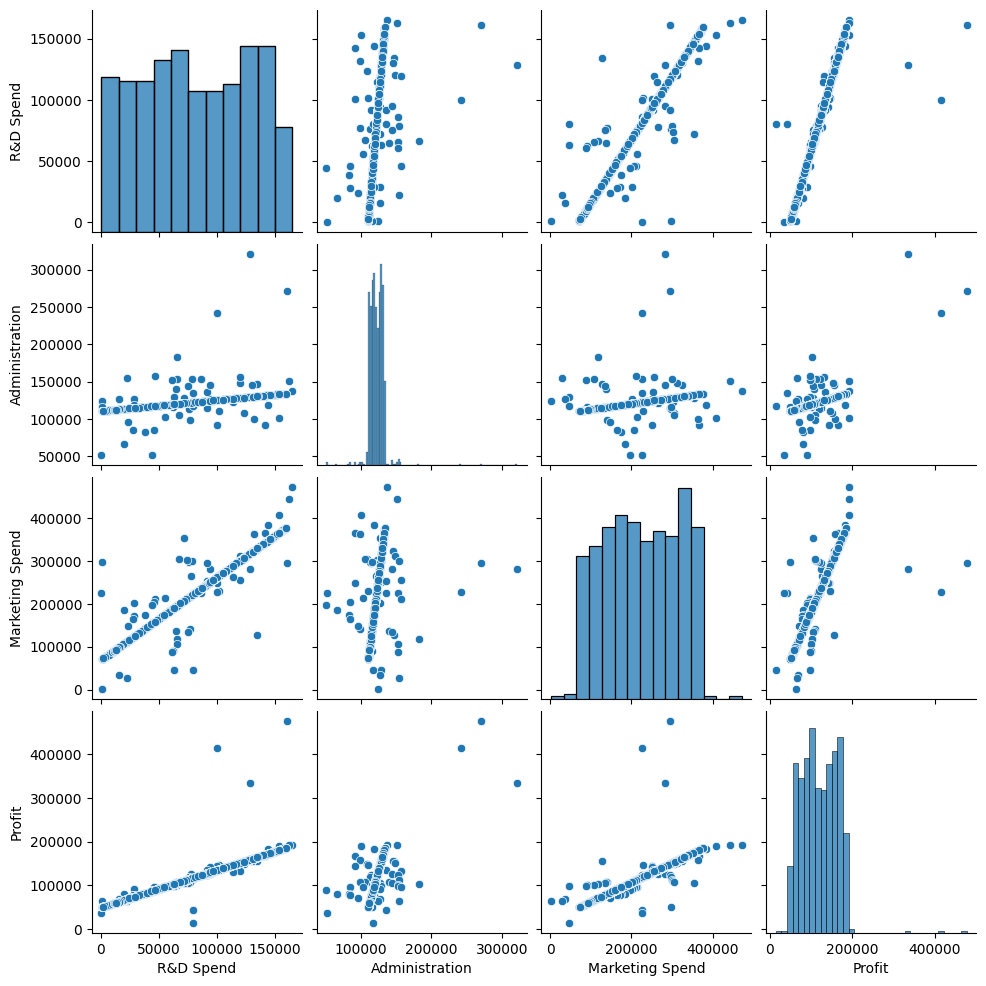

In [83]:
sns.pairplot(df)

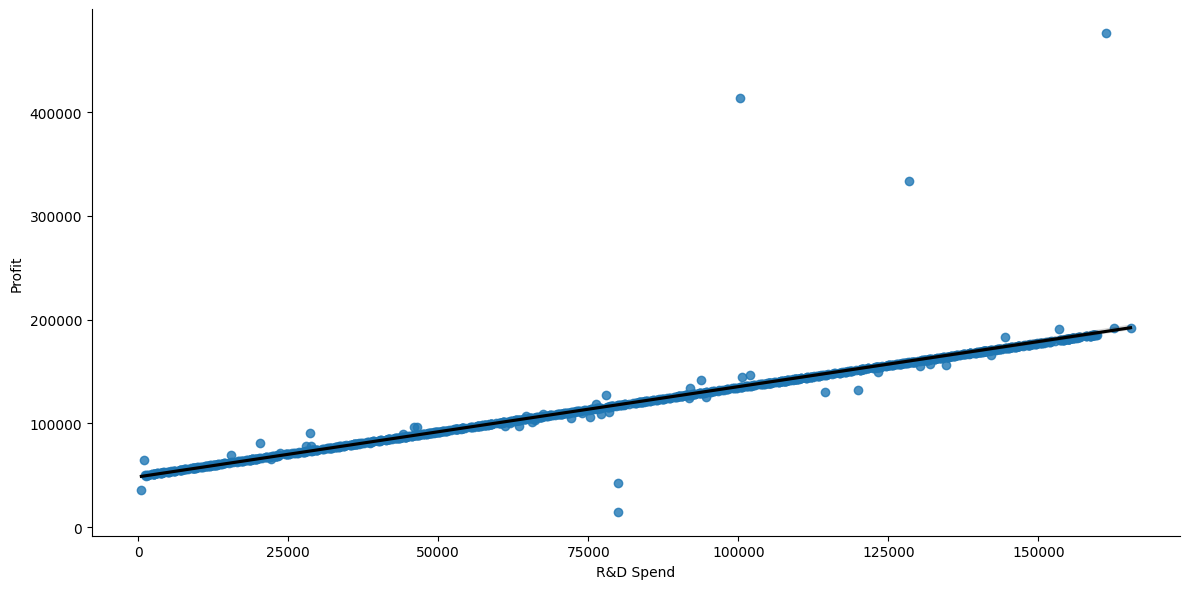

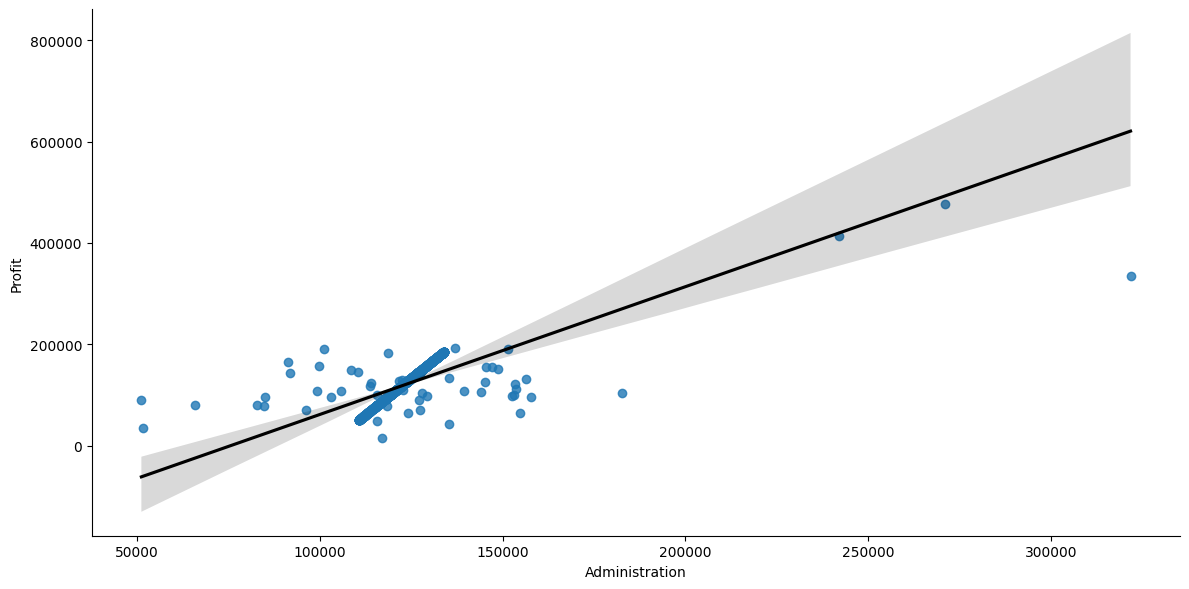

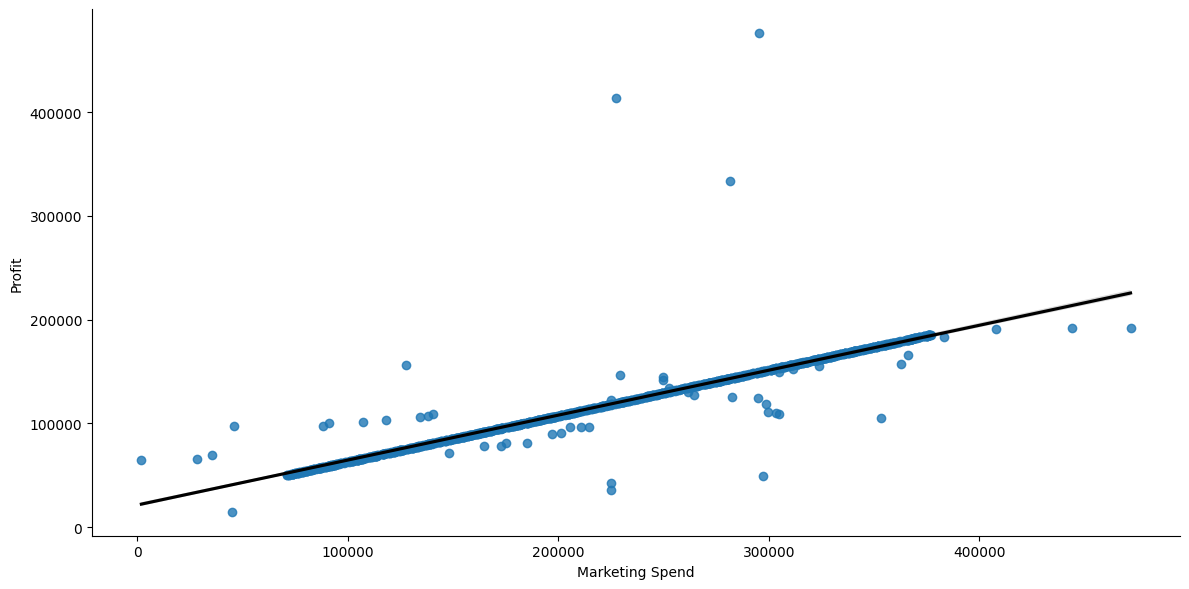

In [85]:
for f in num[:-1]:
    sns.lmplot(data=df,x=f,y='Profit',line_kws={"color":"black"},height=6,aspect=2)

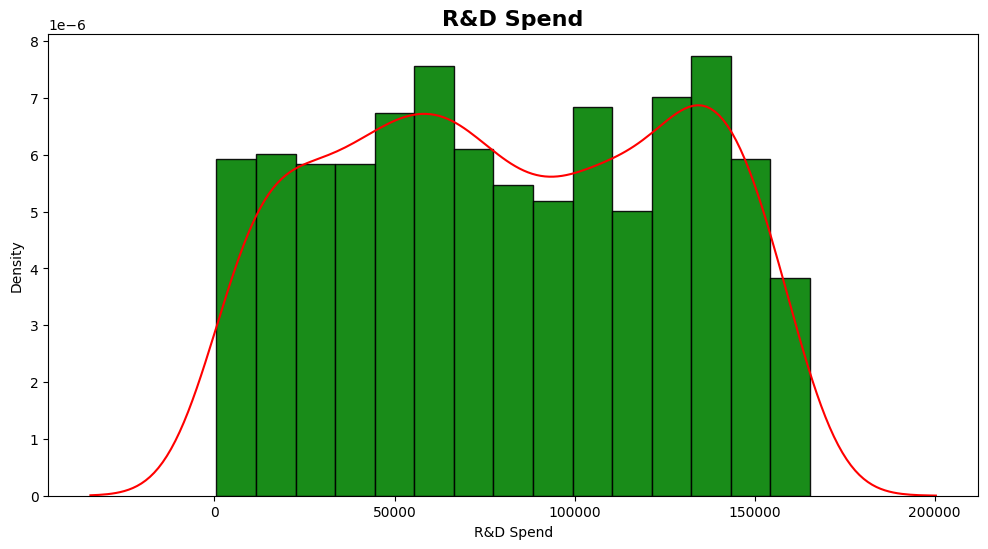

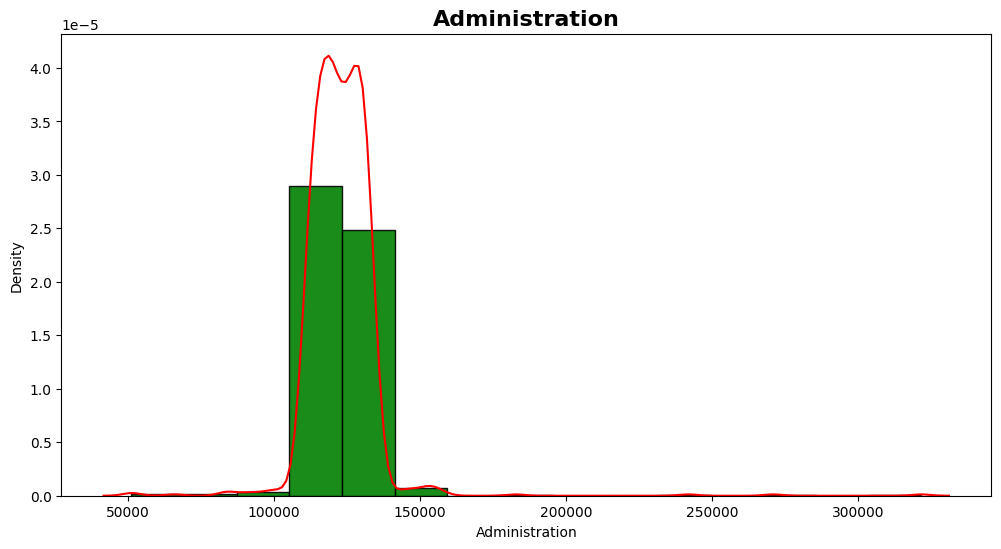

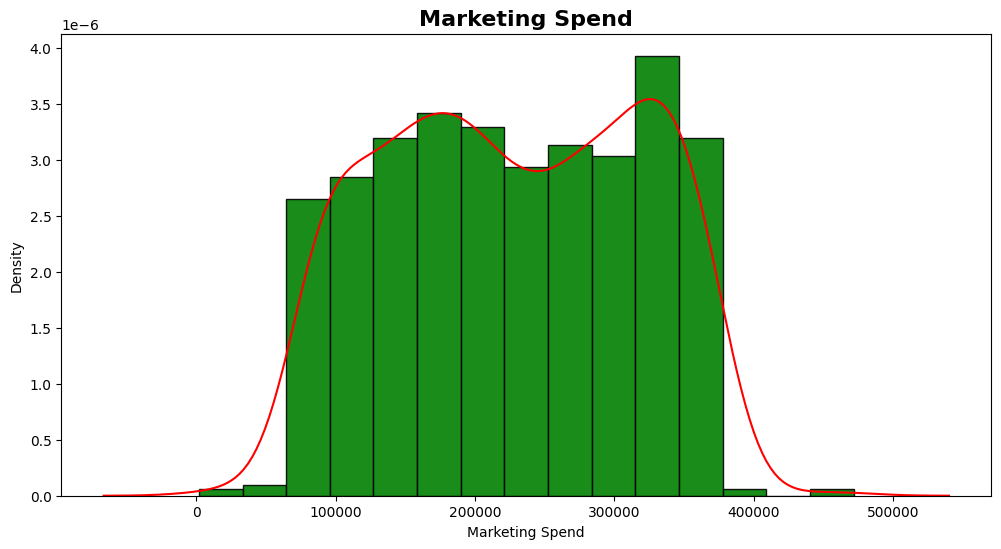

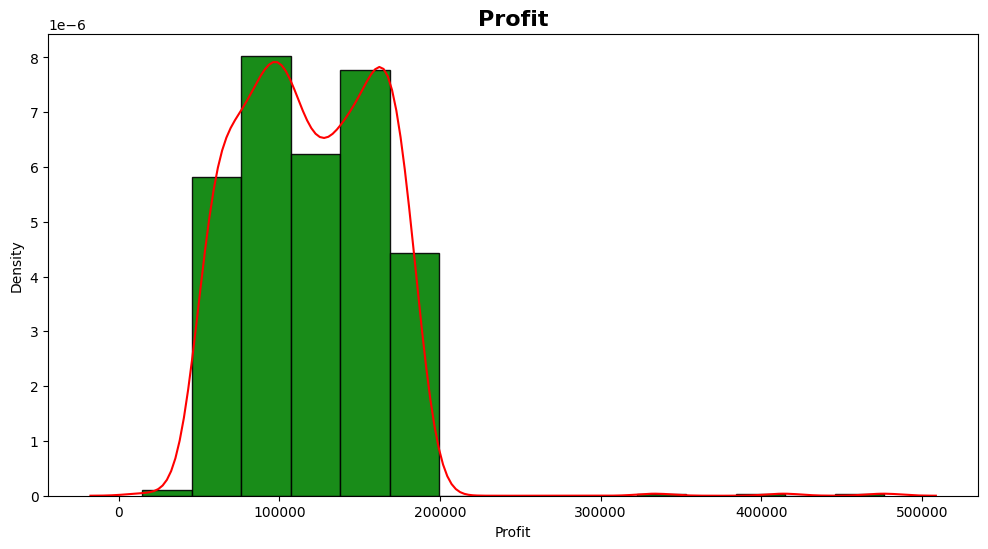

In [98]:
for f in num:
    plt.figure(figsize=(12,6))
    plt.title(f,fontsize=16,weight='bold')
    sns.distplot(df[f],bins=15,kde=True,kde_kws={"color":"red"},hist_kws={"edgecolor":"black","color":"green","alpha":0.9})
    plt.show()

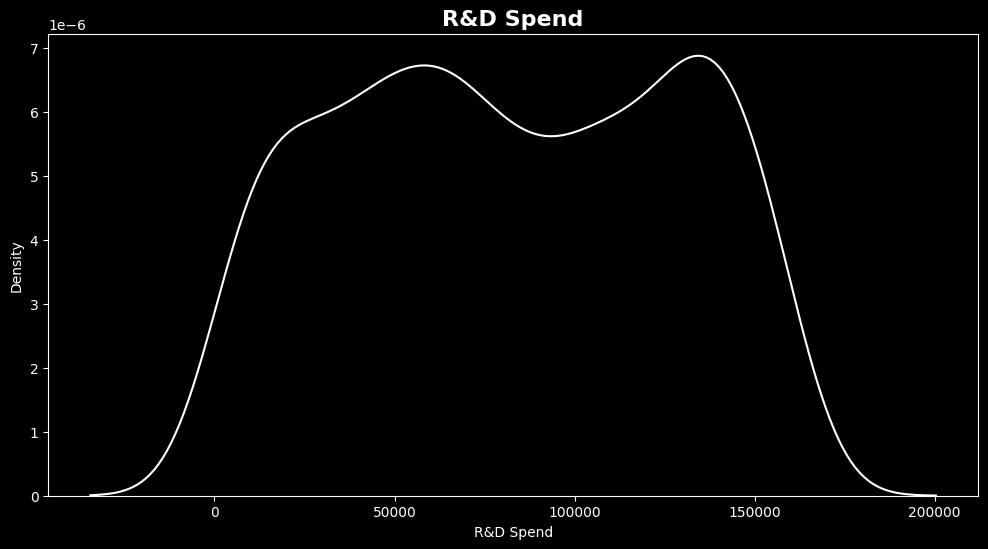

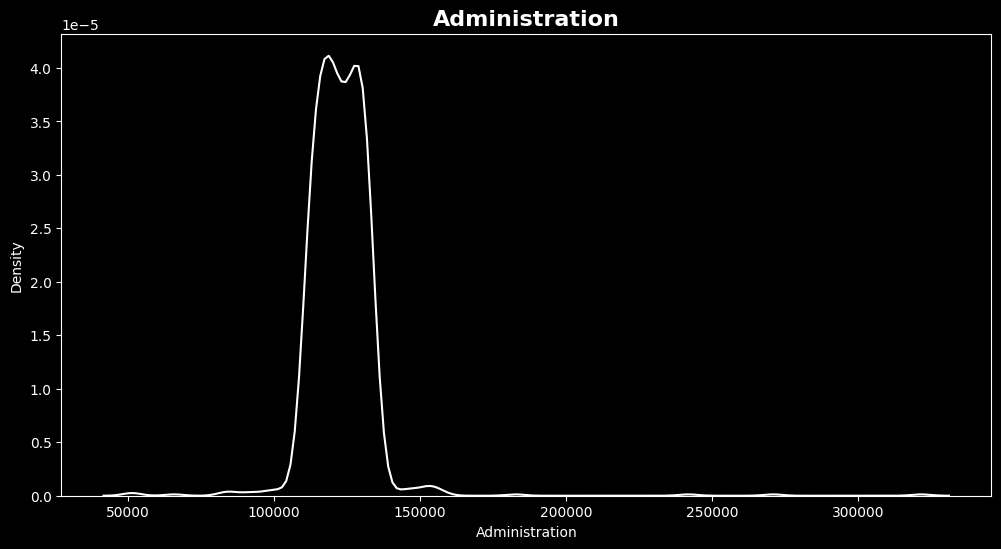

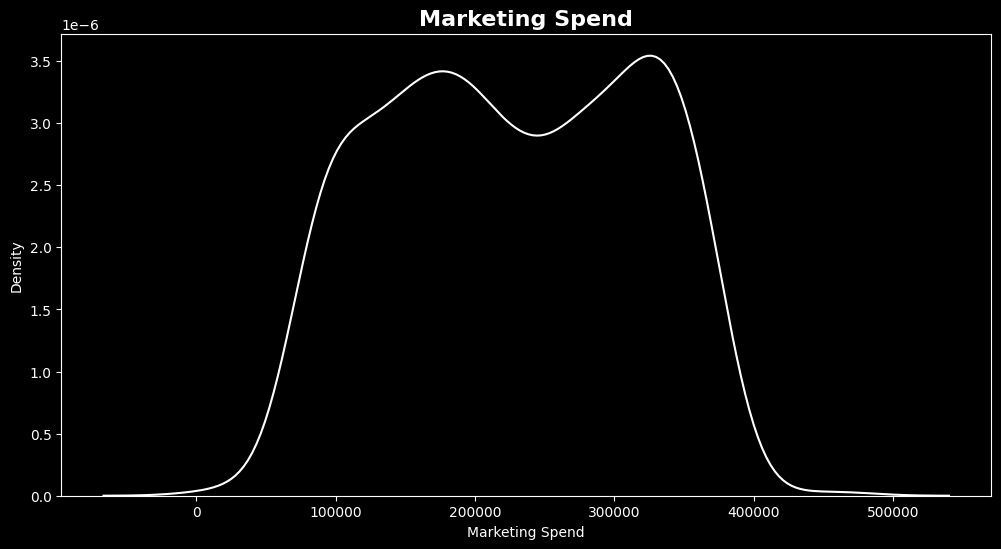

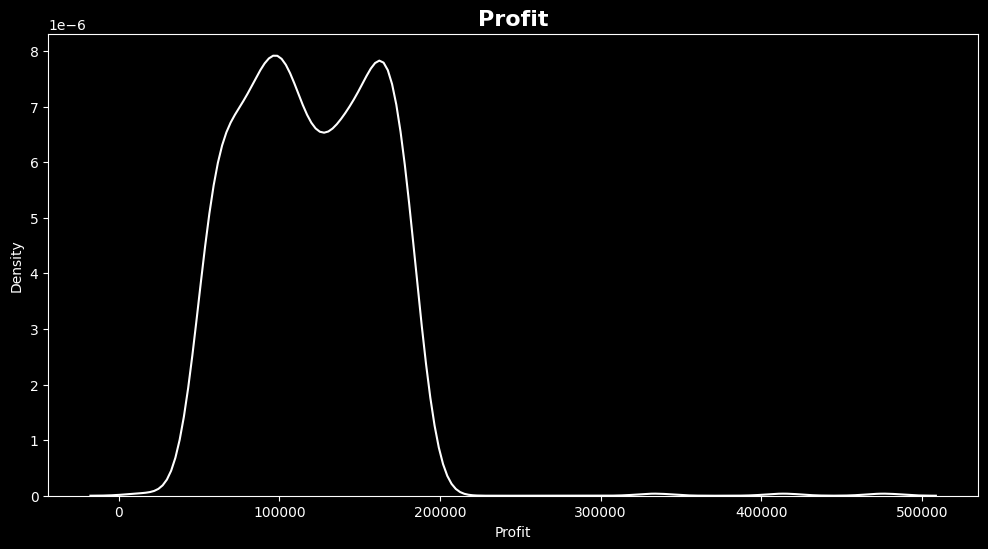

In [104]:
with plt.style.context("dark_background"):
    for f in num:
        plt.figure(figsize=(12,6))
        plt.title(f,fontsize=16,weight='bold')
        sns.kdeplot(data=df,x=f,color="white")
        plt.show()

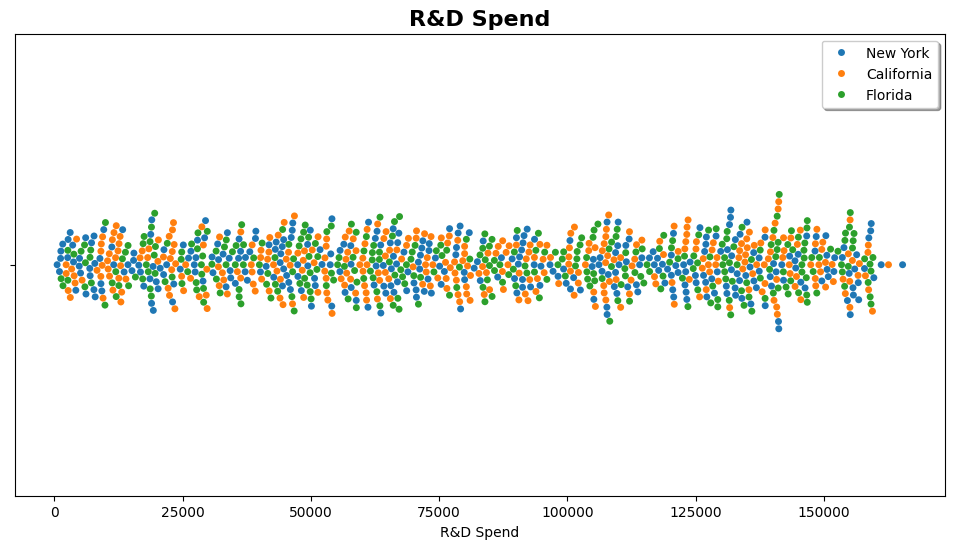

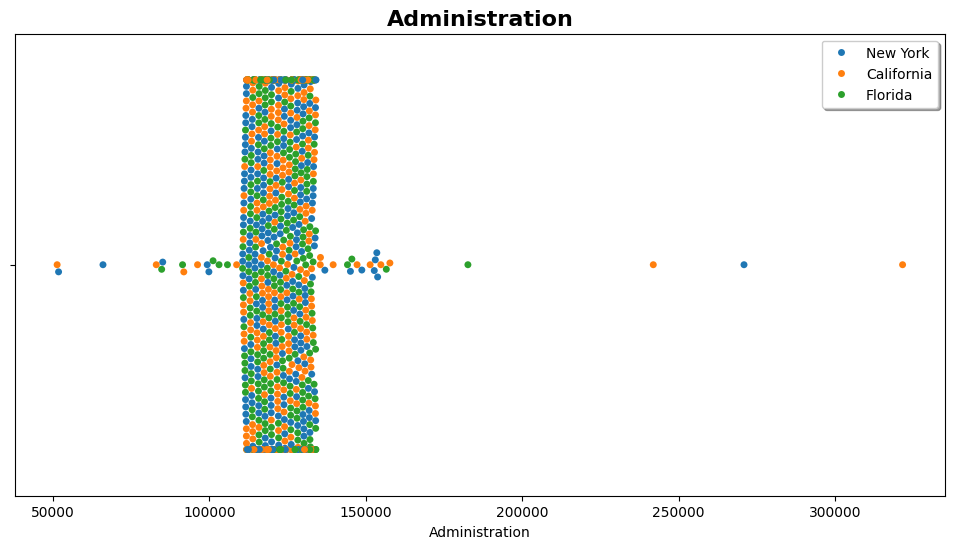

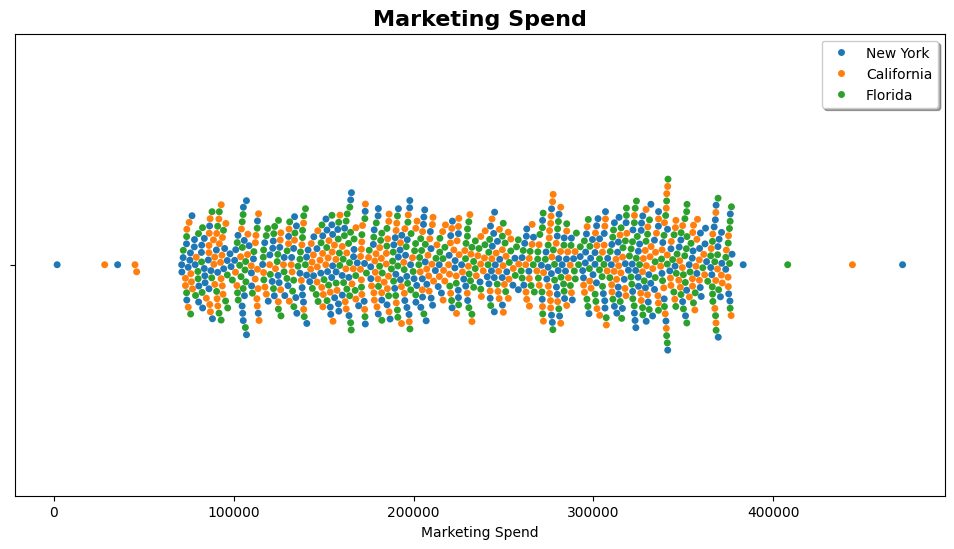

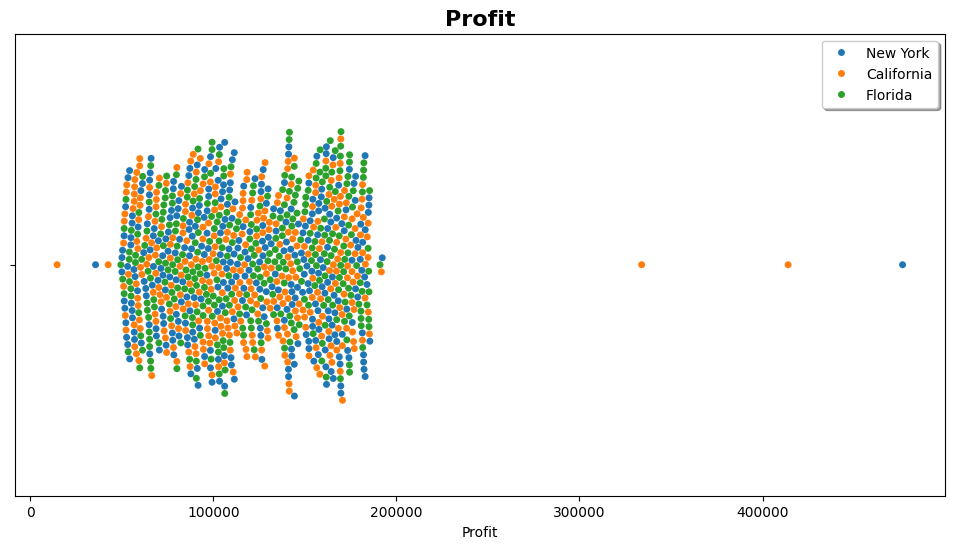

In [109]:
for f in num:
    plt.figure(figsize=(12,6))
    plt.title(f,fontsize=16,weight='bold')
    sns.swarmplot(data=df,x=f,hue='State')
    plt.legend(shadow=True)
    plt.show()

# Data Modeling

In [130]:
mt = make_column_transformer((OrdinalEncoder(),["State"]),remainder='passthrough')

In [132]:
from sklearn import set_config
set_config(display="diagram")
pipe = Pipeline(steps=[("Transformer",mt),("Scaler",StandardScaler()),("Regression",LinearRegression())])

In [133]:
pipe

Pipeline(steps=[('Transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['State'])])),
                ('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [134]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("Profit",axis=1),df["Profit"],test_size=0.2)

In [136]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['State'])])),
                ('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [137]:
pred = pipe.predict(x_test)

In [138]:
print(f"Accuracy Score is: {r2_score(y_test,pred)}")

Accuracy Score is: 0.9781786559142516


In [139]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test,pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,pred)}")

Mean Absolute Error: 1486.7041999265796
Mean Squared Error: 32418619.971366957


In [140]:
rf = RandomForestRegressor(n_estimators=100,criterion='squared_error')

In [141]:
x = df.drop("Profit",axis=1)
y = df["Profit"]

In [142]:
sc = StandardScaler()
x.iloc[:,:-1] = sc.fit_transform(x.iloc[:,:-1])

In [146]:
oe = OrdinalEncoder()
x.iloc[:,-1:]= oe.fit_transform(x.iloc[:,-1:])

In [148]:
x.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,1.800314,1.104642,2.699232,2.0
1,1.741006,2.252563,2.391895,0.0


In [150]:
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    rf = RandomForestRegressor(n_estimators=100,criterion='squared_error')
    rf.fit(x_train,y_train)
    print(f"Random State: {i}  ACC: {rf.score(x_test,y_test)}")

Random State: 0  ACC: 0.7705041946601305
Random State: 1  ACC: 0.9718910745973134
Random State: 2  ACC: 0.9985074291627256
Random State: 3  ACC: 0.9556494961539503
Random State: 4  ACC: 0.9815136234623257
Random State: 5  ACC: 0.9989463200069952
Random State: 6  ACC: 0.9972297775814271
Random State: 7  ACC: 0.6291592047258858
Random State: 8  ACC: 0.9905442374965813
Random State: 9  ACC: 0.9401401396425193
Random State: 10  ACC: 0.9973946253979743
Random State: 11  ACC: 0.9980773199383528
Random State: 12  ACC: 0.9498924326967082
Random State: 13  ACC: 0.9485873331143959
Random State: 14  ACC: 0.9450794993667342
Random State: 15  ACC: 0.9312921332220623
Random State: 16  ACC: 0.9930032414586715
Random State: 17  ACC: 0.9395320346288091
Random State: 18  ACC: 0.9962560937858754
Random State: 19  ACC: 0.9978949707740564
Random State: 20  ACC: 0.9962072119723344
Random State: 21  ACC: 0.9795152484400446
Random State: 22  ACC: 0.9944413454219143
Random State: 23  ACC: 0.9876751142174965
Ra

In [151]:
rf = RandomForestRegressor()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9937438222217714
0.9986418725460746


In [152]:
pred = rf.predict(x_test)
print(f"R2 Score: {r2_score(y_test,pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,pred)}")

R2 Score: 0.9986418725460746
Mean Absolute Error: 331.6838879450038
Mean Squared Error: 2273010.048949742


In [153]:
import joblib
joblib.dump(rf,"RFR.h5")

['RFR.h5']